In [1]:
import serial


ModuleNotFoundError: No module named 'serial'

In [4]:
import serial

ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()
while(True):
    line=ser.readline()
    print(line)
    


b'\x1b[2J\r\n'
b'Soil,Temperature,Humidity\r\n'
b'0,31,89\r\n'
b'1023,31,89\r\n'
b'1017,31,89\r\n'
b'1019,31,89\r\n'
b'1019,31,89\r\n'
b'1019,31,89\r\n'
b'1019,31,89\r\n'
b'1020,31,89\r\n'
b'1020,31,89\r\n'
b'1020,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1021,31,89\r\n'
b'1020,31,89\r\n'
b'1020,31,89\r\n'
b'1018,31,89\r\n'
b'1019,31,89\r\n'
b'1018,31,89\r\n'
b'1018,31,89\r\n'
b'1018,31,89\r\n'
b'1018,31,89\r\n'
b'1019,31,89\r\n'
b'1019,31,89\r\n'
b'1019,31,89\r\n'
b'1019,31,89\r\n'
b'1018,31,89\r\n'
b'1021,31,89\r\n'
b'1020,31,89\r\n'
b'1020,31,89\r\n'
b'1021,31,89\r\n'


KeyboardInterrupt: 

In [5]:
import serial
import numpy as np
import pandas as pd

# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    lines.append(line)

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Column 1', 'Column 2', 'Column 3'])

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# write the dataframe to the Excel file
df.to_excel('output.xlsx', index=False)


# all lines updating code


Soil,Temperature,Humidity
0,0,0
1023,0,0
1023,0,0
1023,0,0
1023,0,0
1023,0,0
1023,0,0
1023,0,0


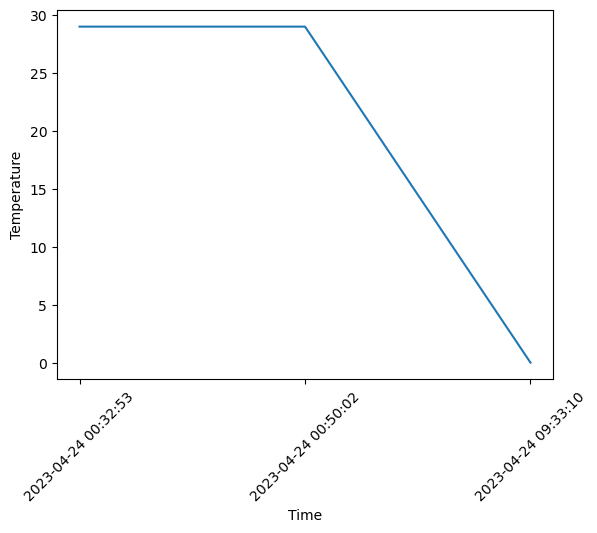

In [13]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# drop any rows with missing values
df = df.dropna()

# write the dataframe to the Excel file
df.to_excel('output.xlsx', index=False)

# plot temperature over time
plt.plot(df['Time'], df['Temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()


# remove duplite value and zero values to graph


Soil,Temperature,Humidity
0,30,91
444,30,91
388,30,91
391,30,91
394,30,91
397,30,91
398,30,91
400,30,91


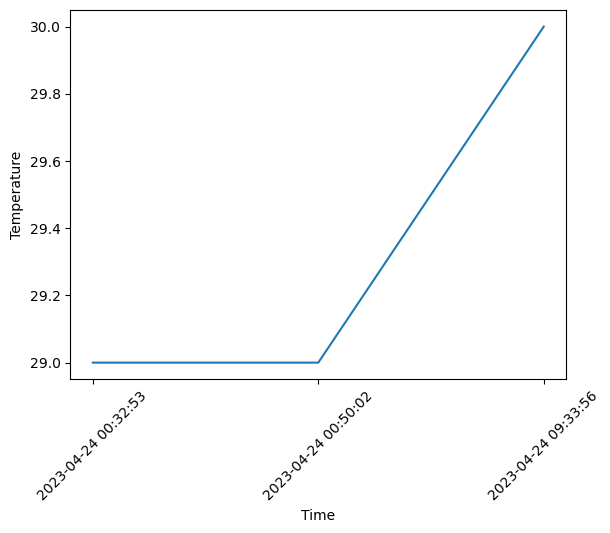

In [14]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# check if first 5 lines have duplicate values and skip them if all values are the same
df_check = pd.DataFrame([x.split(',') for x in lines[:5]], columns=['Soil Moisture', 'Temperature', 'Humidity'])
if len(df_check.drop_duplicates()) == 1:
    print("Duplicate values detected in first 5 lines. Skipping data...")
    lines = lines[5:]

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# drop any rows with missing values
df = df.dropna()

# drop rows with 0 sensor reading values
df = df[(df['Soil Moisture'] != 0) & (df['Temperature'] != 0) & (df['Humidity'] != 0)]

# write the dataframe to the Excel file, dropping rows with 0 values
df = df[(df != 0).all(1)]
df.to_excel('output.xlsx', index=False)

# plot temperature over time
plt.plot(df['Time'], df['Temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()


# try to get 3 values same graph



Soil,Temperature,Humidity
0,30,92
409,30,92
382,30,92
382,30,92
381,30,92
381,30,92
381,30,92
381,30,92


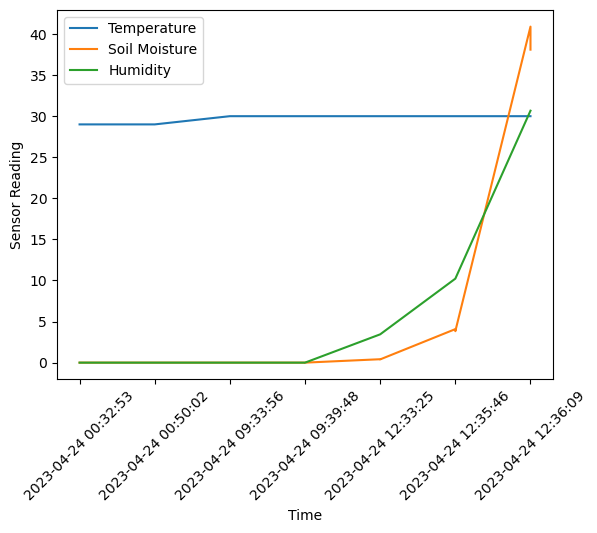

In [16]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# check if first 5 lines have duplicate values and skip them if all values are the same
df_check = pd.DataFrame([x.split(',') for x in lines[:5]], columns=['Soil Moisture', 'Temperature', 'Humidity'])
if len(df_check.drop_duplicates()) == 1:
    print("Duplicate values detected in first 5 lines. Skipping data...")
    lines = lines[5:]

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# divide soil moisture by 10 and humidity by 3
df['Soil Moisture'] /= 10
df['Humidity'] /= 3

# drop any rows with missing values
df = df.dropna()

# drop rows with 0 sensor reading values
df = df[(df['Soil Moisture'] != 0) & (df['Temperature'] != 0) & (df['Humidity'] != 0)]

# write the dataframe to the Excel file, dropping rows with 0 values
df = df[(df != 0).all(1)]
df.to_excel('output.xlsx', index=False)

# plot temperature, soil moisture, and humidity over time
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'], label='Temperature')
ax.plot(df['Time'], df['Soil Moisture'], label='Soil Moisture')
ax.plot(df['Time'], df['Humidity'], label='Humidity')
ax.set_xlabel('Time')
ax.set_ylabel('Sensor Reading')
ax.legend()
plt.xticks(rotation=45)
plt.show()



Soil,Temperature,Humidity
0,30,94
380,30,94
353,30,94
353,30,94
352,30,94
353,30,94
352,30,94
352,30,94


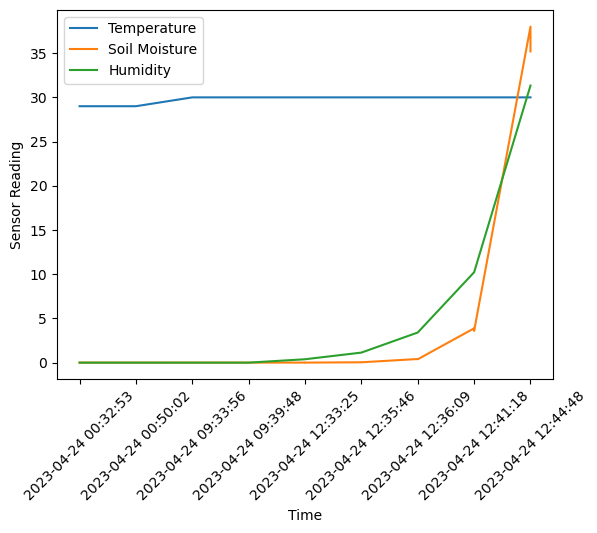

In [18]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# check if first 5 lines have duplicate values and skip them if all values are the same
df_check = pd.DataFrame([x.split(',') for x in lines[:5]], columns=['Soil Moisture', 'Temperature', 'Humidity'])
if len(df_check.drop_duplicates()) == 1:
    print("Duplicate values detected in first 5 lines. Skipping data...")
    lines = lines[5:]

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# divide soil moisture by 10 and humidity by 3
df['Soil Moisture'] /= 10
df['Humidity'] /= 3

# drop any rows with missing values
df = df.dropna()

# drop rows with 0 sensor reading values
df = df[(df != 0).all(1)]

# write the dataframe to the Excel file, dropping rows with 0 values
df.to_excel('output.xlsx', index=False)

# plot temperature, soil moisture, and humidity over time
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'], label='Temperature')
ax.plot(df['Time'], df['Soil Moisture'], label='Soil Moisture')
ax.plot(df['Time'], df['Humidity'], label='Humidity')
ax.set_xlabel('Time')
ax.set_ylabel('Sensor Reading')
ax.legend()
plt.xticks(rotation=45)
plt.show()


In [19]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# check if first 5 lines have duplicate values and skip them if all values are the same
df_check = pd.DataFrame([x.split(',') for x in lines[:5]], columns=['Soil Moisture', 'Temperature', 'Humidity'])
if len(df_check.drop_duplicates()) == 1:
    print("Duplicate values detected in first 5 lines. Skipping data...")
    lines = lines[5:]

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# convert columns to numeric data type
df_new['Soil Moisture'] = pd.to_numeric(df_new['Soil Moisture'], errors='coerce')
df_new['Temperature'] = pd.to_numeric(df_new['Temperature'], errors='coerce')
df_new['Humidity'] = pd.to_numeric(df_new['Humidity'], errors='coerce')

# divide soil moisture by 10 and humidity by 3
df_new['Soil Moisture'] /= 10
df_new['Humidity'] /= 3

# drop any rows with missing values
df_new = df_new.dropna()

# drop rows with 0 sensor reading values
df_new = df_new[(df_new['Soil Moisture'] != 0) & (df_new['Temperature'] != 0) & (df_new['Humidity'] != 0)]

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    # remove rows with 0 values from existing dataframe
    df_existing = df_existing[(df_existing != 0).all(1)]
    # remove rows with same timestamp as new data
    df_existing = df_existing[~df_existing['Time'].isin(df_new['Time'].tolist())]
    # concatenate new and existing dataframes
    df = pd.concat([df_existing, df_new], ignore_index=True)
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# divide soil moisture by 10 and humidity by 3
df['Soil Moisture'] /= 10
df['Humidity'] /= 3

# drop any rows with missing values
df = df.dropna()

# drop rows with 0 sensor reading values
df = df[(df['Soil Moisture'] != 0) & (df['Temperature'] != 0) & (df['Humidity'] != 0)]

# write the dataframe to the Excel file, dropping rows with 0 values and duplicates



Soil,Temperature,Humidity
0,30,95
377,30,95
355,30,95
355,30,95
355,30,95
356,30,95
356,30,95
356,30,95



Soil,Temperature,Humidity
0,27,95
431,27,95
380,27,95
379,27,95
380,27,95
380,27,95
380,27,95
380,27,95


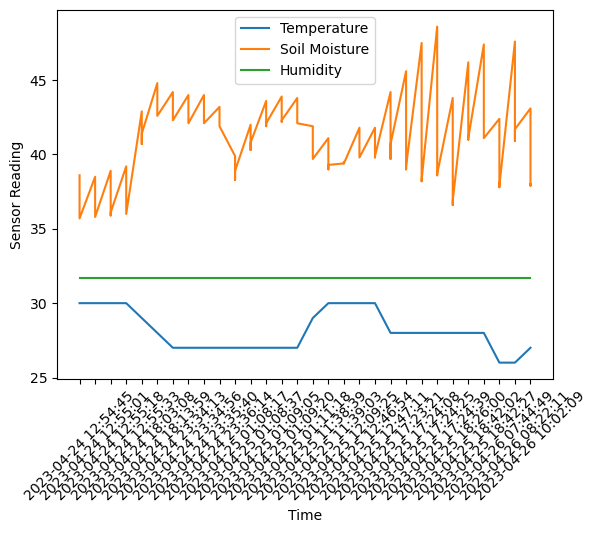

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# check if first 5 lines have duplicate values and skip them if all values are the same
df_check = pd.DataFrame([x.split(',') for x in lines[:5]], columns=['Soil Moisture', 'Temperature', 'Humidity'])
if len(df_check.drop_duplicates()) == 1:
    print("Duplicate values detected in first 5 lines. Skipping data...")
    lines = lines[5:]

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')



# drop any rows with missing values or 0 sensor reading values
df = df[(df != 0).all(1)].dropna()

# write the dataframe to the Excel file
df.to_excel('output.xlsx', index=False)

# divide soil moisture by 10 and humidity by 3
df['Soil Moisture'] /= 10
df['Humidity'] /= 3

# plot temperature, soil moisture, and humidity over time
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'], label='Temperature')
ax.plot(df['Time'], df['Soil Moisture'], label='Soil Moisture')
ax.plot(df['Time'], df['Humidity'], label='Humidity')
ax.set_xlabel('Time')
ax.set_ylabel('Sensor Reading')
ax.legend()
plt.xticks(rotation=45)
plt.show()


""""


#FOR PREDICT VALUES

current_hour=now_hour = datetime.datetime.now().hour
print(current_hour)
current_soil_moisture=800

# Wait for the connection to be established
while not ser.is_open:
    pass

# Define the arduino variable as the serial connection
arduino = ser

df = pd.read_excel("output.xlsx")
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df_filtered = df.drop_duplicates(subset=['Hour'], keep='first')
df_filtered['Soil Moisture']
X = df_filtered[['Hour']]
y = df_filtered['Soil Moisture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
hour_df = pd.DataFrame({'Hour': range(24)})
hour_df['Predicted Soil Moisture'] = model.predict(hour_df[['Hour']])
print(hour_df['Predicted Soil Moisture'])


predictValue=hour_df.loc[hour_df['Hour'] == now_hour, 'Predicted Soil Moisture'].iloc[0]

# Compare the predicted soil moisture value to the current soil moisture value
if predictValue < current_soil_moisture:
    arduino.write(b'5,5')  # Set pin 4 to 5V
else:
    arduino.write(b'5,0')  # Set pin 4 to 0V

""""

# predict from data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data from Excel sheet
df = pd.read_excel('output.xlsx')

# Set date time column as index
df.set_index('Time', inplace=True)

# Define forecasting horizon
forecast_horizon = 30

# Generate future dates for forecasting horizon
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=forecast_horizon+1, freq='D')[1:]

# Split data into training and testing sets
train = df.iloc[:-forecast_horizon]
test = df.iloc[-forecast_horizon:]

# Define models for each variable
moisture_model = ARIMA(train['Soil Moisture'], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend='c')
temperature_model = ARIMA(train['Temperature'], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend='c')
humidity_model = ARIMA(train['Humidity'], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend='c')

# Fit models and generate predictions
moisture_predictions = fit_and_predict(moisture_model, train['Soil Moisture'], test['Soil Moisture'])
temperature_predictions = fit_and_predict(temperature_model, train['Temperature'], test['Temperature'])
humidity_predictions = fit_and_predict(humidity_model, train['Humidity'], test['Humidity'])

# Define a function to fit a forecasting model and generate predictions
def fit_and_predict(model, train_data, test_data):
    model.fit(train_data)
    future_predictions = model.predict(len(test_data))
    return future_predictions

# Combine actual and predicted data for plotting
moisture_data = np.concatenate((train['Soil Moisture'].values, moisture_predictions))
temperature_data = np.concatenate((train['Temperature'].values, temperature_predictions))
humidity_data = np.concatenate((train['Humidity'].values, humidity_predictions))
future_dates = pd.date_range(df.index[0], periods=len(moisture_data), freq='D')

# Plot actual and predicted data
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Soil Moisture'], label='Actual Moisture')
plt.plot(df.index, df['Temperature'], label='Actual Temperature')
plt.plot(df.index, df['Humidity'], label='Actual Humidity')
plt.plot(future_dates, moisture_data, label='Predicted Moisture')
plt.plot(future_dates, temperature_data, label='Predicted Temperature')
plt.plot(future_dates, humidity_data, label='Predicted Humidity')
plt.legend()
plt.show()


F:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\New folder\lib\site-packages\

NameError: name 'fit_and_predict' is not defined

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Define function to fit ARIMA model and generate predictions
def fit_and_predict(model, train, test):
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model_fit = model.fit(history)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return predictions

# Load data
data = pd.read_excel('output.xlsx')

# Create datetime index with hourly frequency
start = pd.Timestamp('2023-04-24')
end = pd.Timestamp('2023-04-30 23:00:00')
dt_index = pd.date_range(start, end, freq='H')
data = data.reindex(dt_index)

#data = data.set_index(dt_index)


# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Define models
moisture_model = ARIMA(train['Soil Moisture'], order=(1,1,1))
temperature_model = ARIMA(train['Temperature'], order=(1,1,1))
humidity_model = ARIMA(train['Humidity'], order=(1,1,1))

# Fit models and generate predictions
moisture_predictions = fit_and_predict(moisture_model, train['Soil Moisture'], test['Soil Moisture'])
temperature_predictions = fit_and_predict(temperature_model, train['Temperature'], test['Temperature'])
humidity_predictions = fit_and_predict(humidity_model, train['Humidity'], test['Humidity'])

# Calculate mean absolute error
moisture_mae = np.mean(abs(np.array(moisture_predictions) - np.array(test['Soil Moisture'])))
temperature_mae = np.mean(abs(np.array(temperature_predictions) - np.array(test['Temperature'])))
humidity_mae = np.mean(abs(np.array(humidity_predictions) - np.array(test['Humidity'])))

print('Mean Absolute Error for Soil Moisture:', moisture_mae)
print('Mean Absolute Error for Temperature:', temperature_mae)
print('Mean Absolute Error for Humidity:', humidity_mae)


F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

Mean Absolute Error for Soil Moisture: nan
Mean Absolute Error for Temperature: nan
Mean Absolute Error for Humidity: nan


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_excel("output.xlsx")

# Step 1: Remove any non-numeric columns
numeric_cols = ["Soil Moisture", "Temperature", "Humidity"]
df = df[numeric_cols]

# Step 2: Remove any outliers from the data. You can use the Z-score method to remove outliers.
z_scores = np.abs(stats.zscore(df))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

X = df.drop(["Soil Moisture", "Temperature", "Humidity"], axis=1)
y = df[["Soil Moisture", "Temperature", "Humidity"]]

# Step 3: Convert any non-numeric columns to numeric values
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_excel("output.xlsx")
# Step 1: Remove any non-numeric columns
numeric_cols = ["Soil Moisture", "Temperature", "Humidity"]
df = df[numeric_cols]

# Print the shape of the dataframe at this point
print("Shape after dropping non-numeric columns:", df.shape)

# Step 2: Remove any outliers from the data. You can use the Z-score method to remove outliers.
z_scores = np.abs(stats.zscore(df))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

# Print the shape of the dataframe after removing outliers
print("Shape after removing outliers:", df.shape)

# Split the data into training and testing sets
X = df.drop(["Soil Moisture", "Temperature", "Humidity"], axis=1)
y = df[["Soil Moisture", "Temperature", "Humidity"]]

# Print the shapes of X and y before converting non-numeric columns
print("Shape of X before conversion:", X.shape)
print("Shape of y before conversion:", y.shape)

# Step 3: Convert any non-numeric columns to numeric values
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# Print the shapes of X and y after converting non-numeric columns
print("Shape of X after conversion:", X.shape)
print("Shape of y after conversion:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", y_train.shape)


Shape after dropping non-numeric columns: (175, 3)
Shape after removing outliers: (0, 3)
Shape of X before conversion: (0, 0)
Shape of y before conversion: (0, 3)
Shape of X after conversion: (0, 0)
Shape of y after conversion: (0, 3)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_excel("output.xlsx")

# Drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Split the data into features and target
X = data.drop('Soil Moisture', axis=1)
y = data['Soil Moisture']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Print the R-squared score
print('R-squared score:', model.score(X_test, y_test))

# Predict values for the next 6 hours
last_row = data.tail(1)
for i in range(1, 7):
    X_new = last_row.drop('Soil Moisture', axis=1)
    y_new = model.predict(X_new)
    print(f'Prediction for hour {i}: {y_new[0]}')
    last_row = pd.DataFrame({'Soil Moisture': y_new[0], 'Temperature': last_row['Temperature'].values[0], 'Humidity': last_row['Humidity'].values[0]}, index=[0])
    data = data.append(last_row, ignore_index=True)


R-squared score: 0.213807164254865
Prediction for hour 1: 405.62194556856446
Prediction for hour 2: 405.62194556856446
Prediction for hour 3: 405.62194556856446
Prediction for hour 4: 405.62194556856446
Prediction for hour 5: 405.62194556856446
Prediction for hour 6: 405.62194556856446


C:\Users\MSI\AppData\Local\Temp\ipykernel_4312\2017969747.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(last_row, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_4312\2017969747.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(last_row, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_4312\2017969747.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(last_row, ignore_index=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_4312\2017969747.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(last_row, ignore_index=True)
C:\Users

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read the data from the Excel file
df = pd.read_excel("output.xlsx")

# Add a new column named "Prediction" with default value 0
df["Prediction"] = 1

# Extract the hour from the timestamp column
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour

# Split the data into features and target
X = df[["Soil Moisture", "Temperature", "Humidity", "Hour"]]
y = df["Prediction"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict the values for the entire dataset and update the "Prediction" column
y_pred = model.predict(X)
df["Prediction"] = y_pred

print(df["Prediction"])


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
184    1.0
185    1.0
186    1.0
187    1.0
188    1.0
Name: Prediction, Length: 189, dtype: float64


In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# read the data from Excel file
df = pd.read_excel("output.xlsx")

# convert the "Time" column to datetime column
df["Time"] = pd.to_datetime(df["Time"])

# create a new column for hour from the Time column
df["Hour"] = df["Time"].dt.hour

# separate the input features and target variable
X = df[["Soil Moisture", "Temperature", "Humidity", "Hour"]]
y = df["Soil Moisture"]

# train the linear regression model
model = LinearRegression().fit(X, y)

# make predictions for new data
new_data = pd.DataFrame({
    "Soil Moisture": [30, 35, 40],
    "Temperature": [20, 25, 30],
    "Humidity": [40, 50, 60],
    "Hour": [10, 12, 14]
})
new_predictions = model.predict(new_data)


print(new_predictions)

[30. 35. 40.]


# My code

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import serial

"""
# Initialize the serial connection with the Arduino board
ser = serial.Serial()
ser.port = 'COM10'  # Replace with the correct port for your Arduino board
ser.baudrate = 9600
ser.open()


current_hour=now_hour = datetime.datetime.now().hour
print(current_hour)
current_soil_moisture=800

# Wait for the connection to be established
while not ser.is_open:
    pass

# Define the arduino variable as the serial connection
arduino = ser
"""
df = pd.read_excel("output.xlsx")
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df_filtered = df.drop_duplicates(subset=['Hour'], keep='first')
df_filtered['Soil Moisture']
X = df_filtered[['Hour']]
y = df_filtered['Soil Moisture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#specifies that 20% of the data 
#the remaining 80%

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
hour_df = pd.DataFrame({'Hour': range(24)})
hour_df['Predicted Soil Moisture'] = model.predict(hour_df[['Hour']])
print(hour_df['Predicted Soil Moisture'])

"""
predictValue=hour_df.loc[hour_df['Hour'] == now_hour, 'Predicted Soil Moisture'].iloc[0]

# Compare the predicted soil moisture value to the current soil moisture value
if predictValue < current_soil_moisture:
    arduino.write(b'10,5')  # Set pin 4 to 5V
else:
    arduino.write(b'10,0')  # Set pin 4 to 0V
"""

0     399.169565
1     401.006763
2     402.843961
3     404.681159
4     406.518357
5     408.355556
6     410.192754
7     412.029952
8     413.867150
9     415.704348
10    417.541546
11    419.378744
12    421.215942
13    423.053140
14    424.890338
15    426.727536
16    428.564734
17    430.401932
18    432.239130
19    434.076329
20    435.913527
21    437.750725
22    439.587923
23    441.425121
Name: Predicted Soil Moisture, dtype: float64


"\npredictValue=hour_df.loc[hour_df['Hour'] == now_hour, 'Predicted Soil Moisture'].iloc[0]\n\n# Compare the predicted soil moisture value to the current soil moisture value\nif predictValue < current_soil_moisture:\n    arduino.write(b'5,5')  # Set pin 4 to 5V\nelse:\n    arduino.write(b'5,0')  # Set pin 4 to 0V\n"

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data =pd.read_excel("output.xlsx")
print(data.columns)

model =LinearRegression()
model.fit(data[["Humidity","Temperature","Soil Moisture"]],data['Water level'])
#give some values you want.use 3 veriables and water amount as y
model.predict([[27,95]])


Index(['Soil Moisture', 'Temperature', 'Humidity', 'Time'], dtype='object')


F:\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-205.95434808])

In [23]:
import serial

# Initialize the serial connection with the Arduino board
ser = serial.Serial()
ser.port = 'COM10'  # Replace with the correct port for your Arduino board
ser.baudrate = 9600
ser.open()

# Wait for the connection to be established
while not ser.is_open:
    pass

# Send the command to set the voltage on pin 5 to 5V
ser.write(b'4,5')

# Close the serial connection
ser.close()


# DATA GETTING CODE


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# set up the serial connection
ser = serial.Serial()
ser.port = 'COM10'
ser.baudrate = 9600
ser.open()

# define the number of lines to read
num_lines = 10

# read the specified number of lines from the serial port
lines = []
for i in range(num_lines):
    line = ser.readline().decode().strip() # decode bytes to string and remove leading/trailing whitespace
    print(line)
    lines.append(line)

# check if first 5 lines have duplicate values and skip them if all values are the same
df_check = pd.DataFrame([x.split(',') for x in lines[:5]], columns=['Soil Moisture', 'Temperature', 'Humidity'])
if len(df_check.drop_duplicates()) == 1:
    print("Duplicate values detected in first 5 lines. Skipping data...")
    lines = lines[5:]

# create a pandas dataframe from the lines
df_new = pd.DataFrame([x.split(',') for x in lines], columns=['Soil Moisture', 'Temperature', 'Humidity'])
df_new['Time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # add current timestamp as a new column

# try to read the existing Excel file, or create a new one if it doesn't exist yet
try:
    df_existing = pd.read_excel('output.xlsx')
    df = pd.concat([df_existing, df_new], ignore_index=True) # append the new data to the existing data
except FileNotFoundError:
    df = df_new

# convert columns to numeric data type
df['Soil Moisture'] = pd.to_numeric(df['Soil Moisture'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')



# drop any rows with missing values or 0 sensor reading values
df = df[(df != 0).all(1)].dropna()

# write the dataframe to the Excel file
df.to_excel('output.xlsx', index=False)

# divide soil moisture by 10 and humidity by 3
df['Soil Moisture'] /= 10
df['Humidity'] /= 3

# plot temperature, soil moisture, and humidity over time
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'], label='Temperature')
ax.plot(df['Time'], df['Soil Moisture'], label='Soil Moisture')
ax.plot(df['Time'], df['Humidity'], label='Humidity')
ax.set_xlabel('Time')
ax.set_ylabel('Sensor Reading')
ax.legend()
plt.xticks(rotation=45)
plt.show()


